## Softmax Classification for Fashion MNIST : PyTorch

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import random
import numpy as np
import matplotlib.pyplot as plt

## Step 0. Device Stepup

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
random.seed(111)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

print("Device : ", device)

Device :  cuda


Hyperparameters

In [ ]:
learning_rate = 1e-3
batch_size = 100
epochs = 50

### Step 1. Data -  target class : 10

In [ ]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [ ]:
print('train_data :', train_data)
print('test_data :', test_data)

train_data : Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
test_data : Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


### Step 2. Softmax Classification Model (input = 784, output = 10 with softmax function)

In [ ]:
class SoftmaxClassificationModel(torch.nn.Module):
    def __init__(self, device):
        super(SoftmaxClassificationModel,self).__init__()
        self.model = nn.Sequential(
          nn.Linear(28*28, 10).to(device),
          # nn.Softmax() is not used here because CrossEntropLoss combines LogSoftmax and NLLLoss in one single class
        )
    def forward(self,x):
        y_pred = self.model(x)
        return y_pred

model = SoftmaxClassificationModel(device)

### Step 3. Loss and Optimizer

In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Step 4. & 5. Train/Test the model

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        y = y.to(device)

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= num_batches
    correct /= size
    print(f"Train - Avg loss: {train_loss:>8f},  Accuracy: {(100*correct):>0.1f}%", end = "  ")

    return train_loss, correct


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.view(-1, 28 * 28).to(device)
            y = y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test - Avg loss: {test_loss:>8f}  Accuracy: {(100*correct):>0.1f}%")

    return test_loss, correct

In [ ]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []
for t in range(epochs):
    print(f"Epoch {t+1} :", end= "  ")
    loss, acc = train_loop(train_dataloader, model, loss_fn, optimizer)
    train_loss.append(loss)
    train_acc.append(acc)

    loss_t, acc_t = test_loop(test_dataloader, model, loss_fn)
    test_loss.append(loss_t)
    test_acc.append(acc_t)

print("Done!")

Epoch 1 :  Train - Avg loss: 1.879258,  Accuracy: 47.6%  Test - Avg loss: 1.559781  Accuracy: 63.4%
Epoch 2 :  Train - Avg loss: 1.385218,  Accuracy: 65.9%  Test - Avg loss: 1.263626  Accuracy: 65.6%
Epoch 3 :  Train - Avg loss: 1.173124,  Accuracy: 67.3%  Test - Avg loss: 1.115377  Accuracy: 66.7%
Epoch 4 :  Train - Avg loss: 1.056466,  Accuracy: 68.6%  Test - Avg loss: 1.025815  Accuracy: 67.9%
Epoch 5 :  Train - Avg loss: 0.981544,  Accuracy: 70.0%  Test - Avg loss: 0.964895  Accuracy: 69.3%
Epoch 6 :  Train - Avg loss: 0.928457,  Accuracy: 71.3%  Test - Avg loss: 0.920088  Accuracy: 70.6%
Epoch 7 :  Train - Avg loss: 0.888279,  Accuracy: 72.5%  Test - Avg loss: 0.885297  Accuracy: 71.7%
Epoch 8 :  Train - Avg loss: 0.856429,  Accuracy: 73.5%  Test - Avg loss: 0.857206  Accuracy: 72.4%
Epoch 9 :  Train - Avg loss: 0.830309,  Accuracy: 74.3%  Test - Avg loss: 0.833855  Accuracy: 73.2%
Epoch 10 :  Train - Avg loss: 0.808332,  Accuracy: 74.9%  Test - Avg loss: 0.814005  Accuracy: 73.7%

### Plot the Training loss

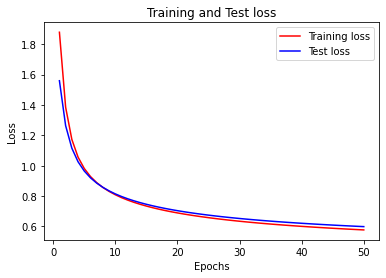

In [ ]:
epochs = np.arange(1, epochs+1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plot the Training Accuracy

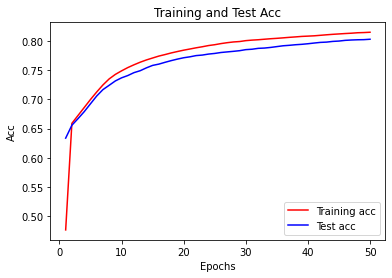

In [ ]:
plt.clf()   # 그래프를 초기화합니다
plt.plot(epochs, train_acc, 'r', label='Training acc')
plt.plot(epochs, test_acc, 'b', label='Test acc')
plt.title('Training and Test Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()